# P-SAT: DETECTING COMPANY REFERENCES IN THE PRESS

In [1]:
# IMPORTS
from tools.utility import *
from articleClassifier import ArticleClassifier 

import json
from sklearn.model_selection import train_test_split

## Fetch Tokenized Cleaned Corpus of Articles

### Load Tokenized Corpus

In [2]:
PATH = "./DEMO_data/corpus/"
file = "cleaned_tokenized_corpus"
with open(PATH + file +".json") as json_file: 
    article_corpus = json.load(json_file) 

### Count number of articles per company

In [3]:
dict_count = dict()
for document in article_corpus:
    labels = document["siren"]
    for siren in labels:
        if siren in dict_count.keys():
            dict_count[siren] +=1
        else:
            dict_count[siren] = 1

### List companies with more than N articles

In [4]:
n_associated_articles = 5
siren_filtered =[key for key in dict_count if dict_count[key] > n_associated_articles]
print ("There are",len(siren_filtered),"companies with MORE than",n_associated_articles,"associated articles")

There are 1501 companies with MORE than 5 associated articles


## Split Corpus into Train and Test sets

In [5]:
test_size = 0.3
X_train_corpus, X_test_corpus = train_test_split(article_corpus, test_size=test_size, random_state=0)
X_test_corpus = clean_corpus_labels (X_test_corpus, siren_filtered) # Removing labels we are not considering

Number of labels removed: 0


## Extract Scored Relevant Words from dictionnairy

### OPTION 1: generate the relevant words

### OPTION 2: load pre-generated words

In [6]:
# load dictionary 
PATH = "./DEMO_data/relevant_words/"
file = "rw_tfidf_sublinear_tf_1501_companies"
a_file = open(PATH + file + ".json", "r")
relevant_words_tfidf = json.load(a_file)
print (file,"is loaded successfully") 

rw_tfidf_sublinear_tf_1501_companies is loaded successfully


In [7]:
# Keep only labels we want to predict
rw_dict = dict()
for siren in siren_filtered:
    if siren in relevant_words_tfidf.keys(): # always
        rw_dict[siren] = relevant_words_tfidf[siren]
relevant_words_tfidf = rw_dict

print("We will be considering",len(relevant_words_tfidf.keys()),"companies")

We will be considering 1501 companies


## Predict Companies of the Test Set

In [11]:
# HYPERPARAMETERS
related_words = relevant_words_tfidf #model related words
corpus = X_test_corpus[:1000]
min_score = 0.9
n_sig_words = 3
t = 250
max_n_pred = None
criterion = "T"

# FIT and PREDICT of ArticleClassifier model
ac_model = ArticleClassifier(n_sig_words,min_score ,t) # Init Article Classifier 
ac_model.fit(related_words)    # fit related words
predictions = ac_model.predict(corpus,max_n_pred, criterion) # evaluate corpus
print ("Predictions on Test Set Complete")

Predictions on Test Set Complete


## Evaluate Prediction

In [12]:
ac_model.evaluate()
ac_model.print_eval(verbose = 2) # verbose = 0,1,2

min_score : 0.9
n_sig_words : 3
t : 250
Number of test articles : 1000
Score 1: 0.768 (with at least ONE label predicted)
Score 2: 0.715 (with ALL labels predicted)
Score 3: 0.715 (with ALL labels predicted in the FIRST predictions)
Score 4: 0.766 (Number of correct predictions over total number of predictions overall)
Average number of predictions 1.002 vs average number of labels : 1.089
The siren that is predicted the most is: 542107651 ( 8 times)

######################### For Each company #########################
AVG ACCURACY : 0.703 True_pos/Pos -> average for each siren
AVG PRECISION: 0.721 True_pos/(True_Pos + False_Pos) -> average for each siren
AVG RECALL   : 0.703 True_pos/(True_Pos + False_Neg) -> average for each siren
AVG F1 score : 0.696 combination of precision and recall -> average for each siren

######################### For Each article #########################
AVG PRECISION: 0.767 #correct_predictions/#predictions-> average for each article
AVG RECALL   : 0.739 #

Text(0.5, 1.0, 'recall hist (on each article)')

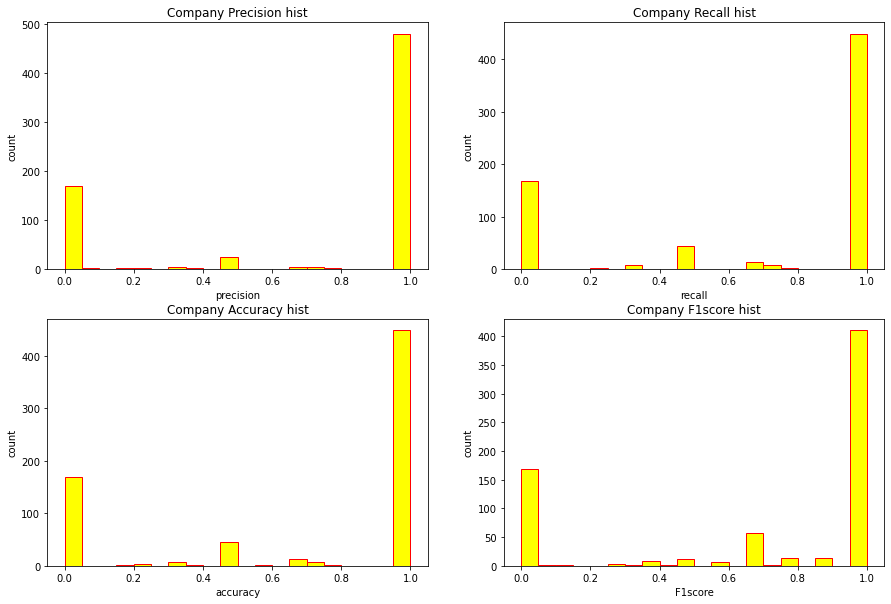

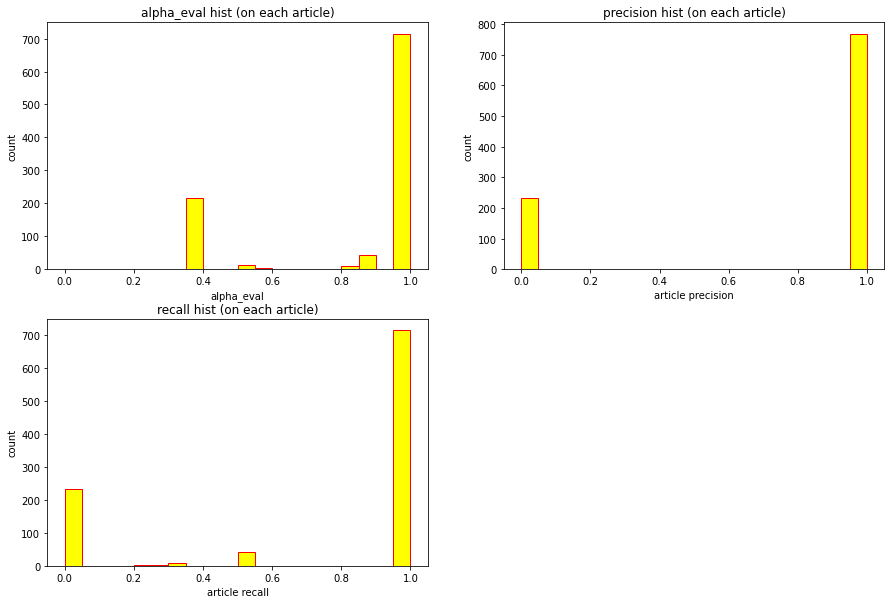

In [13]:
plt.figure(1,figsize=(15,10))
plt.subplot(2, 2, 1)
plt.hist(ac_model.company_precision_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('precision')
plt.ylabel('count')
plt.title('Company Precision hist')
plt.subplot(2, 2, 2)
plt.hist(ac_model.company_recall_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('recall')
plt.ylabel('count')
plt.title('Company Recall hist')
plt.subplot(2, 2, 3)
plt.hist(ac_model.company_accuracy_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('accuracy')
plt.ylabel('count')
plt.title('Company Accuracy hist')
plt.subplot(2, 2, 4)
plt.hist(ac_model.company_F1score_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('F1score')
plt.ylabel('count')
plt.title('Company F1score hist')
plt.figure(2,figsize=(15,10))
plt.subplot(2, 2, 1)
plt.hist(ac_model.alpha_eval_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('alpha_eval')
plt.ylabel('count')
plt.title('alpha_eval hist (on each article)')
plt.subplot(2, 2, 2)
plt.hist(ac_model.article_precision_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('article precision')
plt.ylabel('count')
plt.title('precision hist (on each article)')
plt.subplot(2, 2, 3)
plt.hist(ac_model.article_recall_list, range = (0, 1), bins = 20, color = 'yellow',edgecolor = 'red')
plt.xlabel('article recall')
plt.ylabel('count')
plt.title('recall hist (on each article)')

# Demonstrations on ArticleClassifier functionnalities..

In [36]:
...

Ellipsis